<a href="https://colab.research.google.com/github/pat2121/Textures-CNN/blob/main/DTD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ISAT 449: Emerging Topics in Applied Science

##Final Exam Project: Project 2 - Custom Images

Author: Mallay Jalloh, Pat Whalen

### Objective:

*   To demonstrate the ability to complete an end-to-end data science / machine learning project using  image classification. Create Deep Machine Learning Models in TensorFlow 2.x Keras that use External Datasets as well as TensorFlow Datasets. Models must use Convolutional Neural Networks and Image Classification.

## **Import TensFlow and other libraries**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## **Download and Explore the dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/images/

/content/drive/MyDrive/images


In [ ]:
import pathlib
data_dir='/content/drive/MyDrive/images'
data_dir = pathlib.Path(data_dir)
print(data_dir)

/content/drive/MyDrive/images


In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)


1200


**Show the number of braid textures**

In [ ]:
braided_length = list(data_dir.glob('braided/*.*'))

In [ ]:
len(braided_length)

120

**Show the number of bubbly textures**

In [ ]:
bubbly_length = list(data_dir.glob('bubbly/*.*'))

In [ ]:
len(bubbly_length)

120

## **Here are crystalline textures**

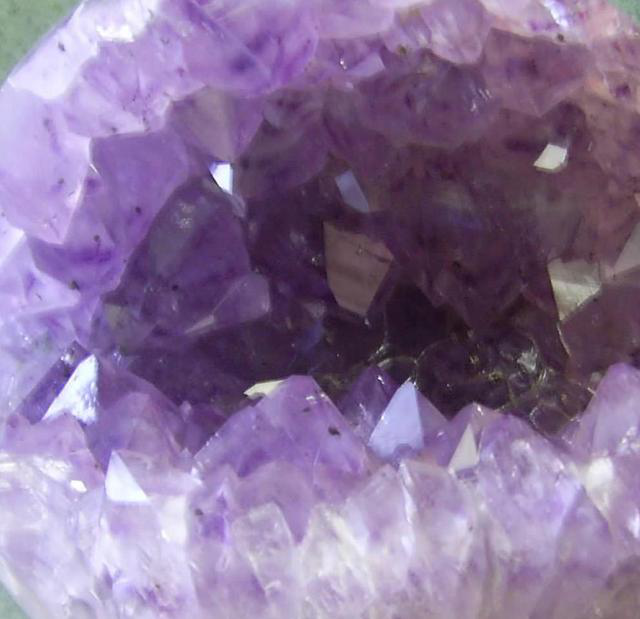

In [ ]:
crystalline = list(data_dir.glob('crystalline/*'))
PIL.Image.open(str(crystalline[4]))

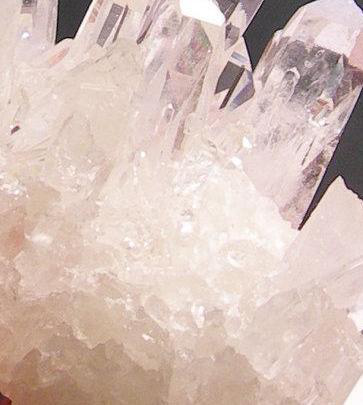

In [ ]:
PIL.Image.open(str(crystalline[1]))

## **Here are some Cobwebbed textures**

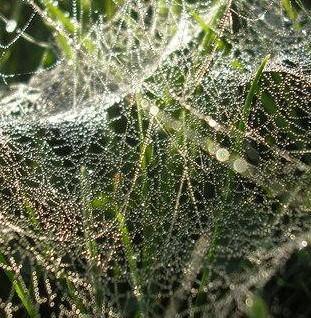

In [ ]:
cobwebbed = list(data_dir.glob('cobwebbed/*'))
PIL.Image.open(str(cobwebbed[2]))

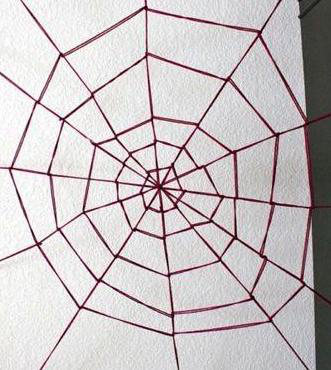

In [ ]:
PIL.Image.open(str(cobwebbed[1]))

## **Load using keras.preprocessing**
### *Create a dataset*

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 1200 files belonging to 10 classes.
Using 960 files for training.


In [ ]:
val_ds = keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 1200 files belonging to 10 classes.
Using 240 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['braided', 'bubbly', 'cobwebbed', 'cracked', 'crystalline', 'honeycombed', 'potholed', 'stained', 'waffled', 'wrinkled']


### *Visualize the dataset*

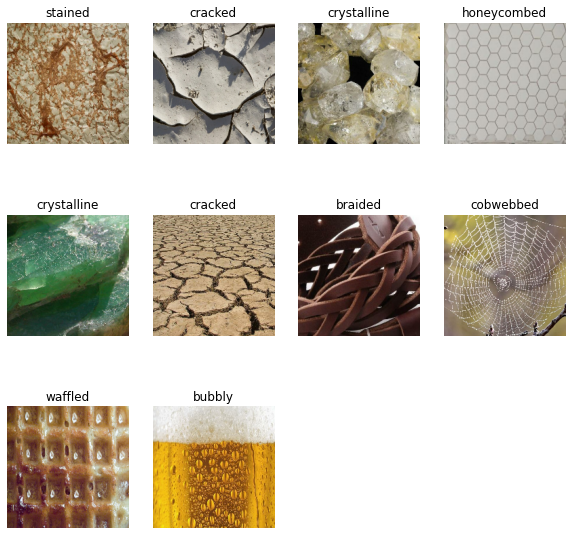

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(10):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


### Configure the dataset for performance

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
#train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)



### *Standardize the data*

In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

print(np.min(first_image), np.max(first_image))


0.0 1.0


## **Create the model**

In [ ]:
num_classes = 10

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'), # 16
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'), # 32
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'), # 64
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'), # 128
  layers.Dense(num_classes)
])


## **Compile the model**


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## **Summary of the model**

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

### Train the model

In [ ]:
epochs=30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
30/30 [==============================] - 4s 118ms/step - loss: 2.2628 - accuracy: 0.1542 - val_loss: 2.1626 - val_accuracy: 0.1875
Epoch 2/30
30/30 [==============================] - 1s 20ms/step - loss: 2.0610 - accuracy: 0.2594 - val_loss: 2.0780 - val_accuracy: 0.2458
Epoch 3/30
30/30 [==============================] - 1s 20ms/step - loss: 1.9323 - accuracy: 0.3240 - val_loss: 1.9677 - val_accuracy: 0.3125
Epoch 4/30
30/30 [==============================] - 1s 19ms/step - loss: 1.7647 - accuracy: 0.4104 - val_loss: 1.9748 - val_accuracy: 0.3333
Epoch 5/30
30/30 [==============================] - 1s 20ms/step - loss: 1.5512 - accuracy: 0.4854 - val_loss: 1.9402 - val_accuracy: 0.3500
Epoch 6/30
30/30 [==============================] - 1s 20ms/step - loss: 1.2842 - accuracy: 0.5823 - val_loss: 2.1785 - val_accuracy: 0.3292
Epoch 7/30
30/30 [==============================] - 1s 20ms/step - loss: 1.1432 - accuracy: 0.6219 - val_loss: 2.3847 - val_accuracy: 0.3417
Epoch 8/30
3

## **Visualize training results**

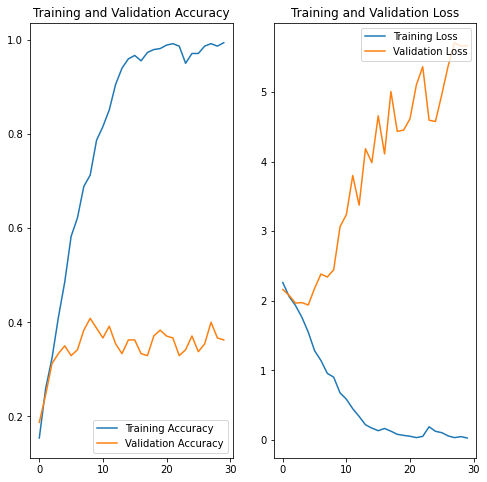

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Data Augumentation

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

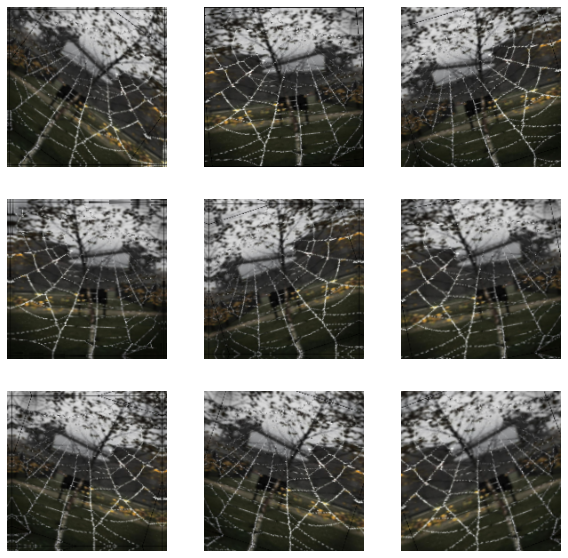

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Drop Out

In [ ]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'), # 16
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'), # 32
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'), # 64
  layers.MaxPooling2D(),
  layers.Dropout(0.1),
  layers.Flatten(),
  layers.Dense(128, activation='relu'), # 128
  layers.Dense(num_classes)
])

### Compile and train the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)       

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
30/30 [==============================] - 1s 32ms/step - loss: 2.2994 - accuracy: 0.1469 - val_loss: 2.2227 - val_accuracy: 0.2375
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 2.1599 - accuracy: 0.2177 - val_loss: 2.1579 - val_accuracy: 0.2583
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 2.0892 - accuracy: 0.2635 - val_loss: 2.1029 - val_accuracy: 0.3000
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 2.0162 - accuracy: 0.3156 - val_loss: 2.0281 - val_accuracy: 0.3125
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 1.9770 - accuracy: 0.3240 - val_loss: 1.9563 - val_accuracy: 0.3250
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 1.9392 - accuracy: 0.3292 - val_loss: 2.0078 - val_accuracy: 0.3333
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 1.8456 - accuracy: 0.3896 - val_loss: 2.0518 - val_accuracy: 0.3333
Epoch 8/20
30

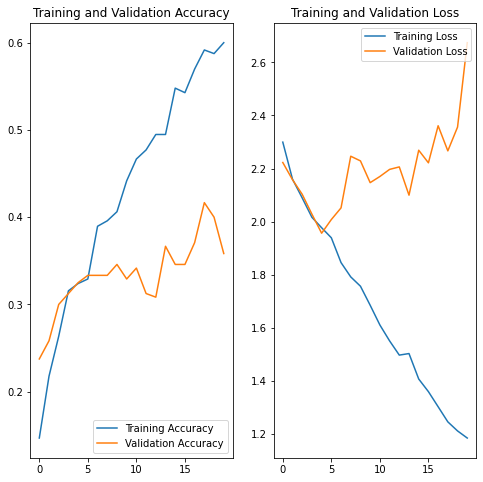

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Confusion Matrix

In [ ]:
#from sklearn import metrics
#print ("Classification Report:")
#print (metrics.classification_report(y_test, y_pred))
#print ("Confusion Matrix:")
#print (metrics.confusion_matrix(y_test, y_pred))

In [ ]:
pip install nbconvert

In [ ]:
!jupyter nbconvert --to html DTD.ipynb

[NbConvertApp] WARNING | pattern u'DTD.ipynb' matched no files
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--execute
    Execute the notebook prior to export.
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.
--no-input
    Exclude input cells and output prompts from converted document. 
    This mode is ideal for generating code-free reports.
--stdout
    Write notebook output to stdout instead of files.
--stdin
    read a single notebook file from stdin. Write the resulting notebook with default basename 'notebook.*'
--inplace
    Run nbconvert